In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import glob
import os
import scipy.stats
from matplotlib import cm
import seaborn as sns
import ast
import scipy.cluster.hierarchy as hierarchy

In [2]:
df = pd.read_csv('Jet_2D_Linkage.csv') #this is my density distance
df = df.sort_values('ACCESS1-0')
df_jet = df.set_index('models')

In [3]:
df = pd.read_csv('High_2D_Linkage.csv') #this is my density distance
df = df.sort_values('ACCESS1-0')
df_high = df.set_index('models')

In [4]:
df = pd.read_csv('Front_Linkage.csv') #this is my density distance
df = df.sort_values('ACCESS1-0')
df_front = df.set_index('models')

In [5]:
def getnormalized(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [6]:
df = getnormalized(df_high) + getnormalized(df_jet)# + getnormalized(df_front)

In [7]:
df = df.dropna(0,how='all').dropna(1,how='all')

In [8]:
df.round(3).to_csv('linkage_distances_nofront.csv')

In [9]:
file = open("Knutti_colours_dict.txt", "r")
contents = file.read()
dict = ast.literal_eval(contents)
file.close()

In [10]:
cols = [dict[index] for index in df.index]

In [11]:
Z = hierarchy.linkage(df, 'ward', metric='euclidean')

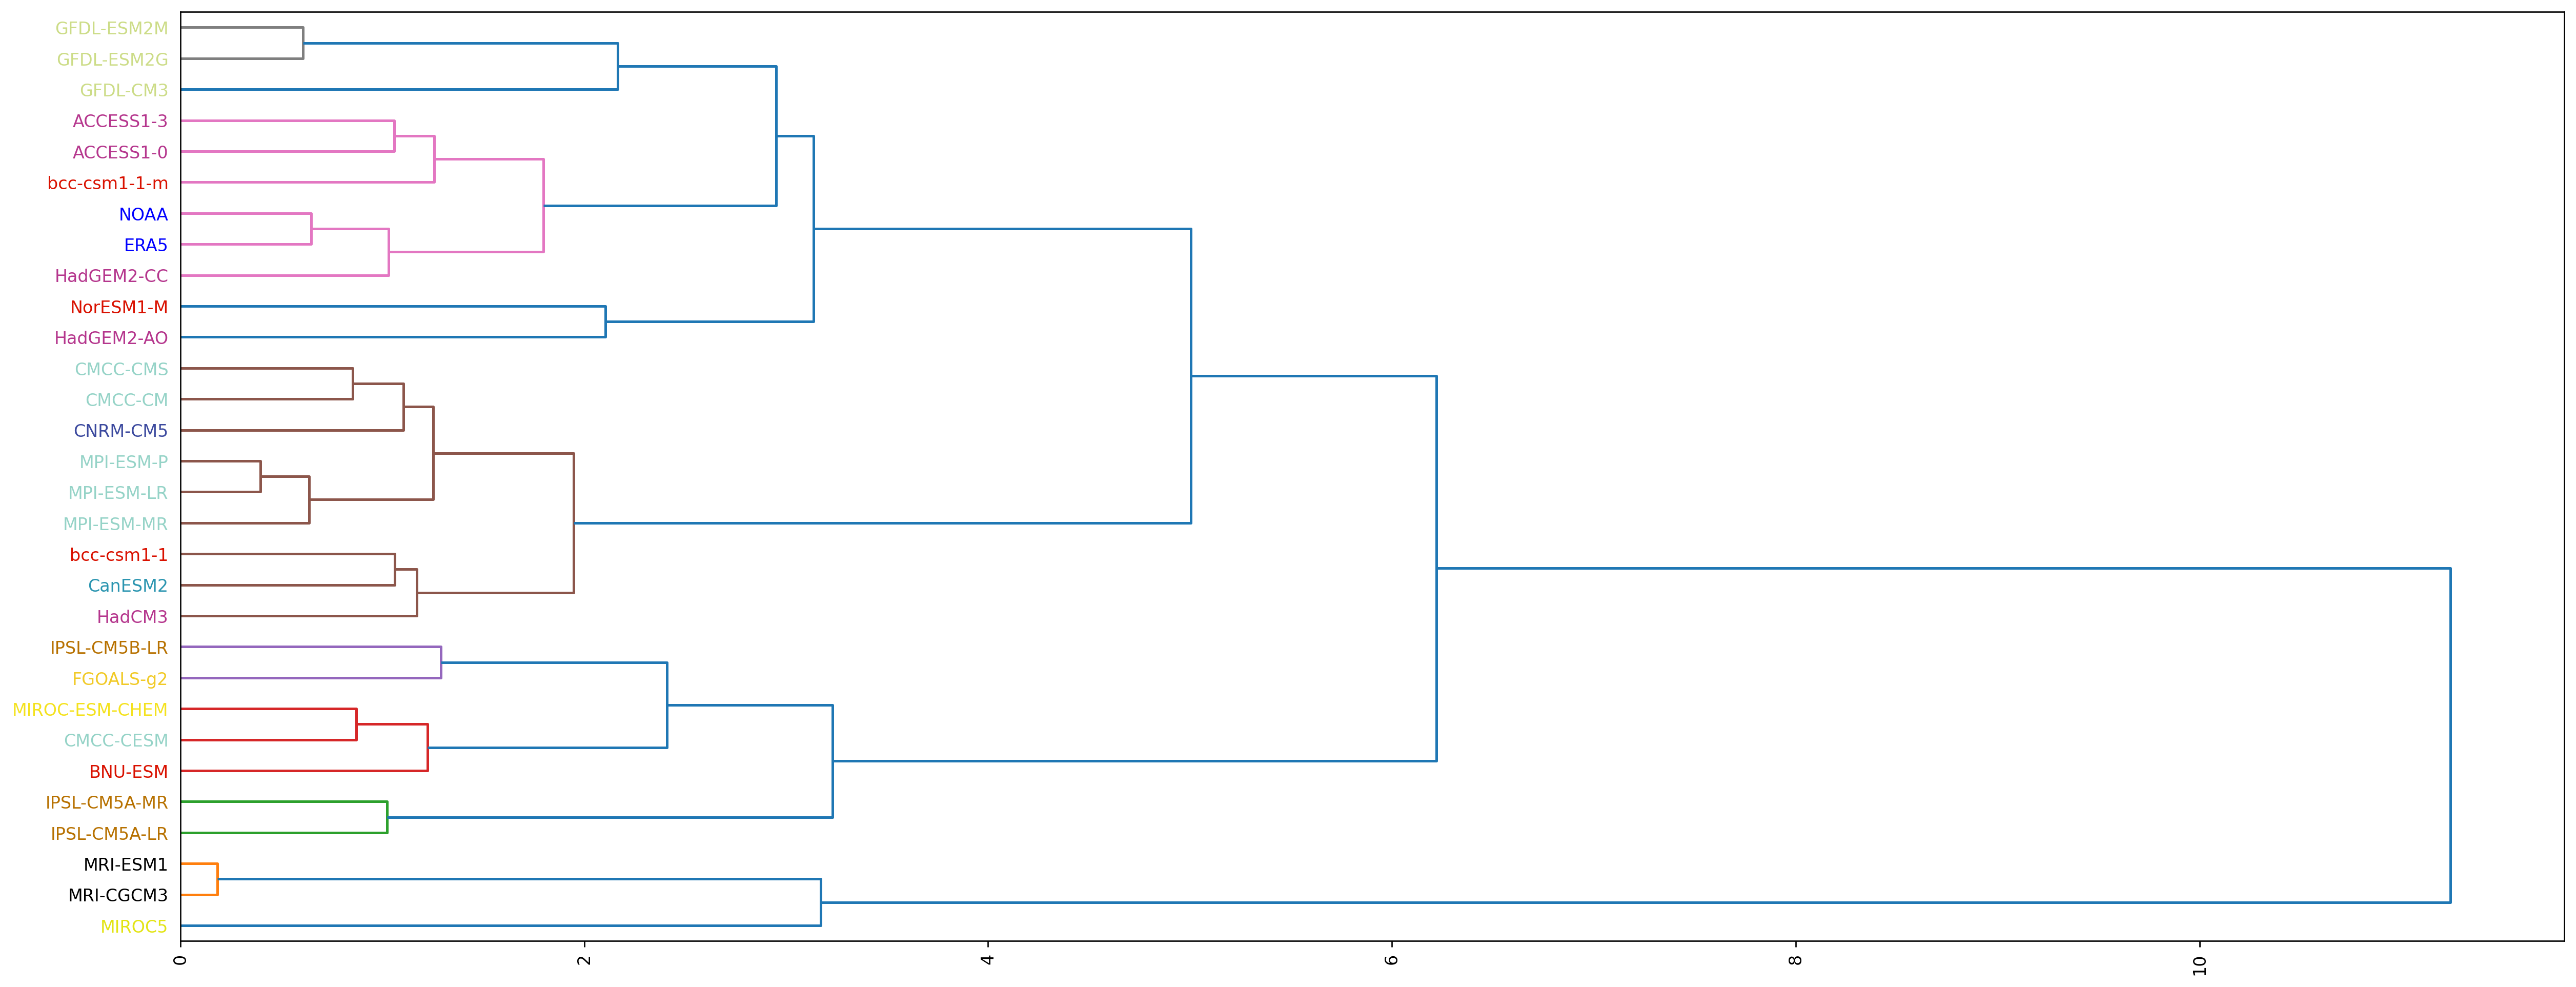

In [12]:
fig = plt.figure(figsize=(25, 10),dpi = 240)
dn = hierarchy.dendrogram(Z,
                        color_threshold=2,
                        labels=list(df.index),
                        orientation='right')

# Apply the right color to each label

cols = [dict[index] for index in dn['ivl']]

ax = plt.gca()
ylbls = ax.get_ymajorticklabels()
num=-1
for lbl in ylbls:
    num+=1
    lbl.set_color(cols[num])


plt.xticks(rotation=90)
plt.savefig('linkageplot_nofront.png',dpi = 240)
plt.savefig('linkageplot_nofront.pdf')

In [13]:
dn['ivl']

['MIROC5',
 'MRI-CGCM3',
 'MRI-ESM1',
 'IPSL-CM5A-LR',
 'IPSL-CM5A-MR',
 'BNU-ESM',
 'CMCC-CESM',
 'MIROC-ESM-CHEM',
 'FGOALS-g2',
 'IPSL-CM5B-LR',
 'HadCM3',
 'CanESM2',
 'bcc-csm1-1',
 'MPI-ESM-MR',
 'MPI-ESM-LR',
 'MPI-ESM-P',
 'CNRM-CM5',
 'CMCC-CM',
 'CMCC-CMS',
 'HadGEM2-AO',
 'NorESM1-M',
 'HadGEM2-CC',
 'ERA5',
 'NOAA',
 'bcc-csm1-1-m',
 'ACCESS1-0',
 'ACCESS1-3',
 'GFDL-CM3',
 'GFDL-ESM2G',
 'GFDL-ESM2M']